In [64]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import bs4 #called `beautifulsoup4`, an html parser

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

In [326]:
import importlib
import counting_words as fcns
import data_ingest as ing

In [348]:
importlib.reload(fcns)
importlib.reload(ing)

<module 'data_ingest' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/data_ingest.py'>

In [264]:
data_directory = '../data/'
filename = 'APW_all_attributes_final.csv'
df = ing.load_prep_data(data_directory+filename)
df.head(2)

,url,title,text,date_written,pages,ethnicity,gender,sexual_orientation,state,relation_to_prison
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner


In [265]:
df = ing.agg_groups(df, 'ethnicity','race_agg',['African American','Latina/o / Hispanic','Multiracial','No information','White (non-Hispanic)'])
df = ing.agg_groups(df, 'gender','gender_agg',['Female','Male','No Information'])

In [266]:
#df.groupby('relation_to_prison').count()

In [267]:
df = ing.norm_text(df)

In [65]:
df = ing.norm_sent(df)

In [41]:
df.head(2)

,url,title,text,date_written,pages,ethnicity,gender,sexual_orientation,state,relation_to_prison,race_agg,tokenized_text,normalized_text
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner,White (non-Hispanic),"[A, PERSON, CANNOT, BECOME, WHO, THEY, NEED, T...","[person, need, remain, wesley, purkey, federal..."
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner,White (non-Hispanic),"[It, is, Good, Justice, is, Blind, Because, Sh...","[good, justice, blind, like, thing, wesley, pu..."


# Basic word counts and word cloud

In [53]:
wordCounts = ct.wordCounter(df['normalized_text'])

In [63]:
wordCounts.head(10)

,word,count
833,prison,15959
162,time,9107
53,year,7478
904,prisoner,6934
80,life,6625
241,inmate,6449
430,state,6414
149,people,6300
1025,have,6135
296,s,5963


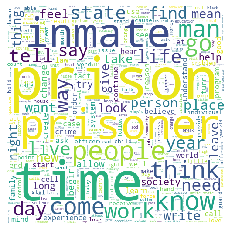

In [56]:
ct.word_cloud(df['normalized_text'])

# Divergence by race, gender, and states

In [219]:
race_fileids, race_corpora, race_count = ct.make_group_corpora(df,'race_agg',text_col='normalized_text')
gender_fileids, gender_corpora, gender_count = ct.make_group_corpora(df,'gender_agg',text_col='normalized_text')
state_fileids, state_corpora, state_count = ct.make_group_corpora(df,'state',text_col='normalized_text')


['White (non-Hispanic)', 'African American', 'Other', 'Multiracial', 'Latina/o / Hispanic', 'No information']
['Male', 'Other', 'Female']
['California', 'Texas', 'Pennsylvania', 'New York', 'Arizona', 'Missouri', 'Virginia', 'Michigan', 'Florida', 'Massachusetts', 'North Carolina', 'Indiana', 'Arkansas', 'Illinois', 'Georgia', 'Tennessee', 'Ohio', 'Idaho', 'Nevada', 'No information']


In [220]:
race_count

,race_agg,count
5,White (non-Hispanic),884
0,African American,581
4,Other,231
2,Multiracial,174
1,Latina/o / Hispanic,152
3,No information,76


In [221]:
gender_count

,gender_agg,count
1,Male,1898
2,Other,107
0,Female,93


In [222]:
state_count

,state,count
4,California,407
41,Texas,187
36,Pennsylvania,154
29,New York,120
2,Arizona,107
23,Missouri,82
43,Virginia,73
20,Michigan,69
8,Florida,61
19,Massachusetts,58


## KL Divergence

Divergence Type: KL


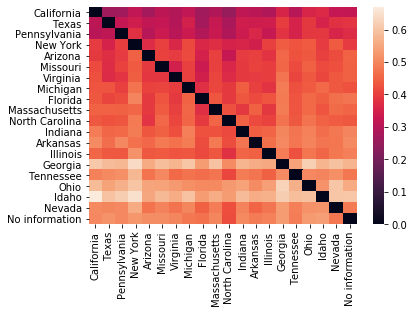

In [223]:
ct.make_heat_map(state_fileids,state_corpora)

Divergence Type: KL


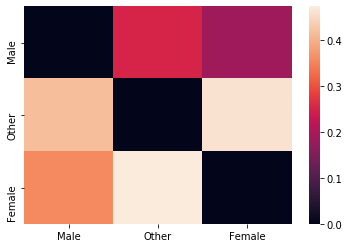

In [224]:
ct.make_heat_map(gender_fileids,gender_corpora)

Divergence Type: KL


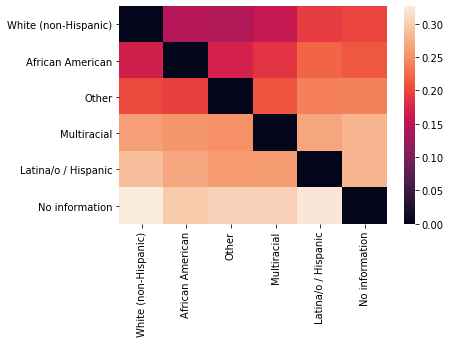

In [225]:
ct.make_heat_map(race_fileids,race_corpora)

## Wasserstein Divergence

Divergence Type: Wasserstein


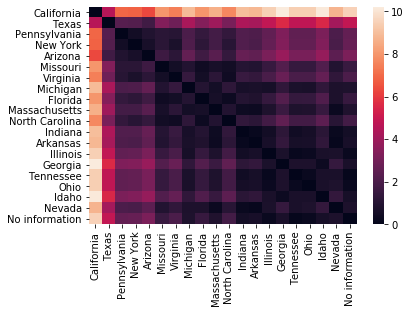

In [226]:
ct.make_heat_map(state_fileids,state_corpora,divergence_type="Wasserstein")

Divergence Type: Wasserstein


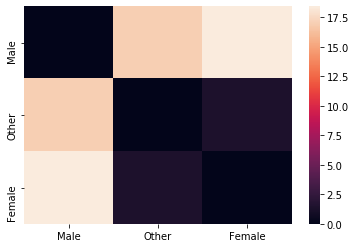

In [227]:
ct.make_heat_map(gender_fileids,gender_corpora,divergence_type="Wasserstein")

Divergence Type: Wasserstein


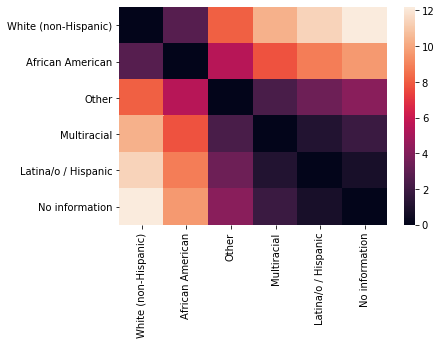

In [228]:
ct.make_heat_map(race_fileids,race_corpora,divergence_type="Wasserstein")

Divergence Type: KS


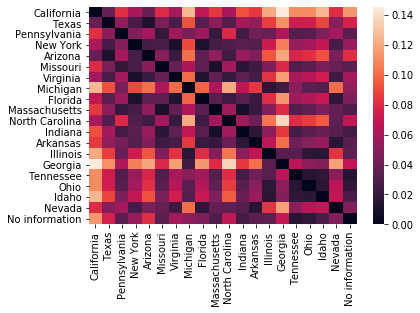

In [229]:
ct.make_heat_map(state_fileids,state_corpora,divergence_type="KS")


Divergence Type: KS


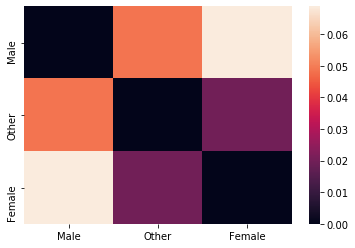

In [230]:
ct.make_heat_map(gender_fileids,gender_corpora,divergence_type="KS")


Divergence Type: KS


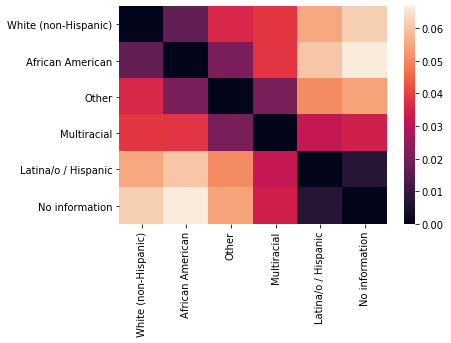

In [231]:
ct.make_heat_map(race_fileids,race_corpora,divergence_type="KS")

In [236]:
race_fileids

['White (non-Hispanic)',
 'African American',
 'Other',
 'Multiracial',
 'Latina/o / Hispanic',
 'No information']

In [233]:
ct.Divergence(race_corpora[0],race_corpora[1])

0.1442014069208455

In [234]:
ct.Divergence(race_corpora[1],race_corpora[0])

0.16944483231279378

### Takeaways

- Definitely appear to be divergences among gender, racial groups and states. 
- However, for KL and Wasserstein divergences, the divergence does seem somewhat correlated with number of essasys falling in that group. That is, groups with a large number of essays appear least divergent from others, whereas groups with a smaller number of essays appear most divergent. This makes sense, given that groups with a larger number of essays probably contain a diverse set of words which make them more similar to other groups. 
- This is less true for KS divergence, except in the case of race
- This is good preliminary suggestive evidence that there are differences among these corpora, but this is just comparing divergences across words. Next we'll do a classification exercise to see if we can actually predict with any accuracy which essays come from which groups


# Classification

In [237]:
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition


In [268]:
df_backup = df.copy()

In [350]:
true_cat='African American'

In [337]:

train, test = fcns.prep_classification_data(df,category_col='race_agg',keep=['African American', 'White (non-Hispanic)'],true_cat=true_cat)



In [340]:
len(train)

1172

In [339]:
len(test)

293

In [341]:
clf = fcns.classification(train,test,'LogisticRegression')

Training Accuracy:
0.9155290102389079
Testing Accuracy:
0.6689419795221843


Precision:
0.9259259259259259
Recall:
0.20833333333333334
F1 Score:
0.3401360544217687
True Category is: African American


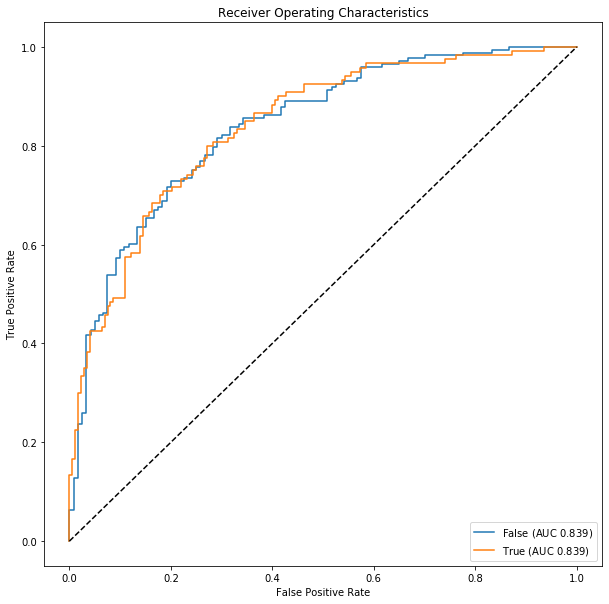

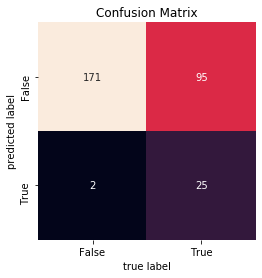

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.331058  0.598386   0.642857           0.642251  0.988439
True        0.331058  0.598386   0.925926           0.517133  0.208333


In [351]:
fcns.evaluation(clf,test,true_cat)

In [269]:
# generate category column
df['category'] = df['race_agg']

In [252]:
# binary race
df = df[df['category'].isin(['African American', 'White (non-Hispanic)'])]

In [253]:
df.groupby('category').count()

,url,title,text,date_written,pages,ethnicity,gender,sexual_orientation,state,relation_to_prison,race_agg,tokenized_text,normalized_text,gender_agg,tokenized_sents,normalized_sents
category,,,,,,,,,,,,,,,,
African American,581,581,581,242,581,581,581,579,581,581,581,581,581,581,581,581
White (non-Hispanic),884,884,884,392,884,884,884,882,884,884,884,884,884,884,884,884


In [254]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(df, holdBackFraction=holdBackFraction)



In [255]:
print(len(train_data_df))
print(len(test_data_df))

1172
293


In [256]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

In [257]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [258]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]



# Logistic Regression

In [259]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9180887372013652


In [260]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))


0.689419795221843


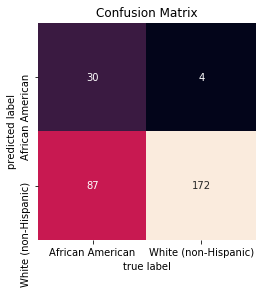

In [261]:
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_data_df)

In [343]:
type(lucem_illud_2020.metrics.evaluateClassifier(logistic_l1, test_data_df))


ValueError: X has 23974 features per sample; expecting 23993

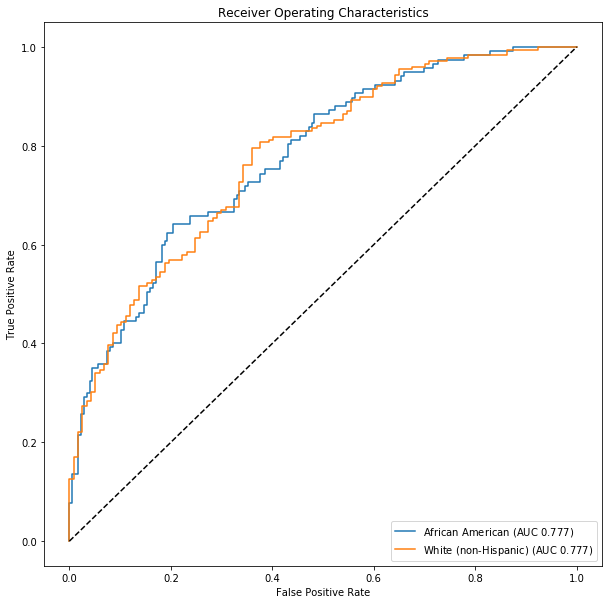

In [263]:
lucem_illud_2020.plotMultiROC(logistic_l1, test_data_df)

# Multinomial

In [328]:
df = df_backup

In [330]:
df.head(2)

,url,title,text,date_written,pages,ethnicity,gender,sexual_orientation,state,relation_to_prison,race_agg,gender_agg,tokenized_text,normalized_text,category
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner,White (non-Hispanic),Male,"[A, PERSON, CANNOT, BECOME, WHO, THEY, NEED, T...","[person, need, remain, wesley, purkey, federal...",White (non-Hispanic)
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,White (non-Hispanic),Male,Heterosexual,Indiana,Death Row Prisoner,White (non-Hispanic),Male,"[It, is, Good, Justice, is, Blind, Because, Sh...","[good, justice, blind, like, thing, wesley, pu...",White (non-Hispanic)


In [280]:
# generate category column
df['category'] = df['race_agg']

In [281]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(df, holdBackFraction=holdBackFraction)

TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]



In [282]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [283]:
train_data_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_data_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))



Training score:
0.5568790946992257


In [284]:
#Add to df
test_data_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_data_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))



Testing score:
0.42720763723150357


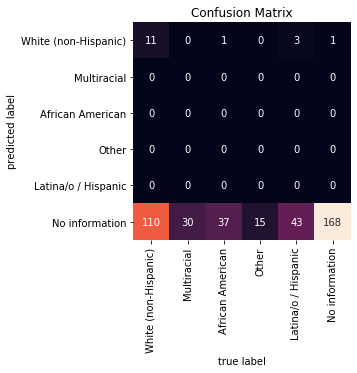

In [285]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_data_df)



In [286]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_data_df)



/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/met

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Multiracial,0.090692,0.500000,0.000000,0.090692,0.000000
African American,0.274463,0.537065,0.687500,0.325030,0.090909
Other,0.109785,0.500000,0.000000,0.109785,0.000000
White (non-Hispanic),0.563246,0.527041,0.416873,0.416793,0.994083
No information,0.035800,0.500000,0.000000,0.035800,0.000000
Latina/o / Hispanic,0.071599,0.500000,0.000000,0.071599,0.000000


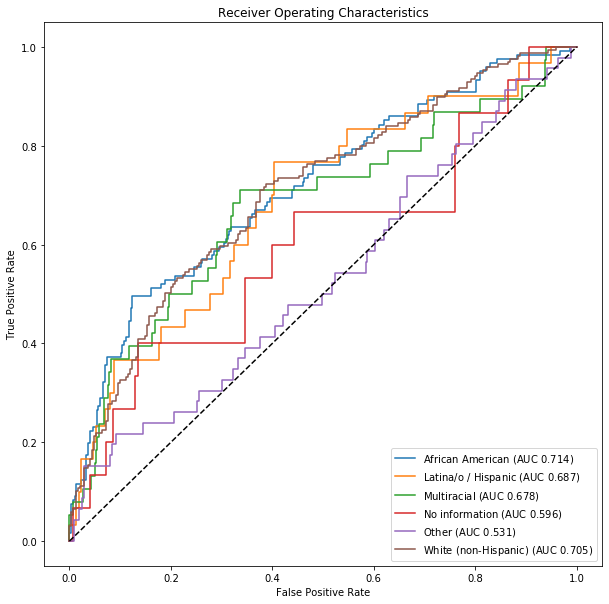

In [287]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_data_df)

# Naive Bayes

In [288]:
# binary race
df = df[df['category'].isin(['African American', 'White (non-Hispanic)'])]

In [299]:
df['category'] = [s == 'African American' for s in df['race_agg']]

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [301]:
#df.head()

In [302]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(df, holdBackFraction=holdBackFraction)

TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]



In [289]:
clf = sklearn.naive_bayes.GaussianNB()

In [291]:
clf.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [293]:
lucem_illud_2020.evaluateClassifier(clf, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
White (non-Hispanic),0.334471,0.58947,0.652510,0.650321,0.954802
African American,0.334471,0.58947,0.764706,0.478567,0.224138


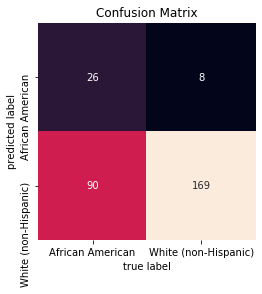

In [294]:
lucem_illud_2020.plotConfusionMatrix(clf, test_data_df)

In [303]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [304]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.818259385665529
Testing:
0.6450511945392492


In [305]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

In [306]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.543859649122807

In [307]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.7815126050420168

In [308]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.6413793103448276

In [310]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'African American' : [],
    'AA_log_prob' : [],
    'White' : [],
    'White_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:20]:
    words_dict['African American'].append(TFVectorizer.get_feature_names()[i])
    words_dict['AA_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:20]:
    words_dict['White'].append(TFVectorizer.get_feature_names()[i])
    words_dict['White_log_prob'].append(prob)
    
pd.DataFrame(words_dict)

,African American,AA_log_prob,White,White_log_prob
0,tv,-2.198630,inner,-2.208059
1,foot,-2.224272,youth,-2.208059
2,2014,-2.250590,moving,-2.248064
3,slowly,-2.250590,listen,-2.268684
4,hospital,-2.264013,spirit,-2.268684
5,blue,-2.277618,developed,-2.289737
6,closed,-2.277618,harsh,-2.289737
7,proven,-2.277618,slavery,-2.289737
8,www,-2.277618,cruel,-2.311243
9,appeal,-2.291412,development,-2.311243


# Decision trees

In [311]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data


In [312]:
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier



BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

In [316]:
#lucem_illud_2020.plotregions(bag, test_data_df)

In [314]:
lucem_illud_2020.evaluateClassifier(bag, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.320819,0.628948,0.672414,0.664287,0.896552
True,0.320819,0.628948,0.704918,0.514104,0.361345


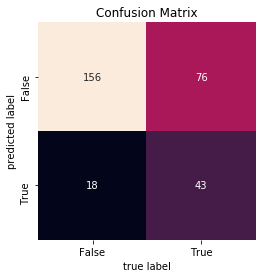

In [315]:
lucem_illud_2020.plotConfusionMatrix(bag, test_data_df)

# SVM

In [317]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [318]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.245734,0.718729,0.738318,0.725034,0.908046
True,0.245734,0.718729,0.797468,0.613315,0.529412


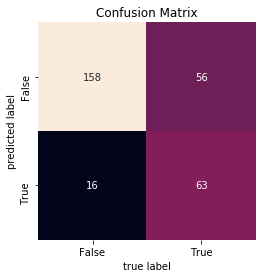

In [319]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_data_df)

In [ ]:
#lucem_illud_2020.plotregions(clf_svm, test_data_df)

# Neural Net

In [320]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [345]:
type(lucem_illud_2020.evaluateClassifier(clf_nn, test_data_df))

pandas.core.frame.DataFrame

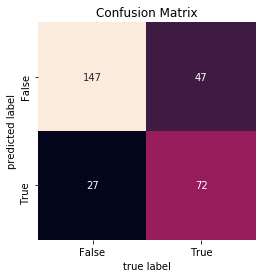

In [322]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_data_df)


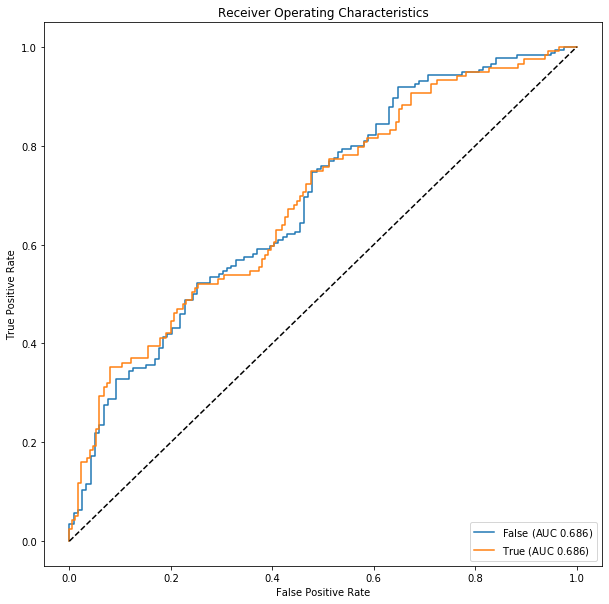

In [324]:
lucem_illud_2020.plotMultiROC(bag, test_data_df)


In [325]:
print("Training:")
print(clf_nn.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(clf_nn.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
1.0
Testing:
0.7474402730375427
